In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -U sentence-transformers > /dev/null

In [3]:
!ls 'drive/MyDrive/Colab Notebooks/nlp/clustering kpa'

1_KPA_clustering.ipynb		     3_legal_clustering.ipynb
2_KPA_clustering_fine-tunning.ipynb  data


In [4]:
import json
import sklearn
import sklearn.model_selection
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [5]:
random_state = 321

# Train/Dev/Test split

In [7]:
test_df = pd.read_csv('drive/MyDrive/Colab Notebooks/nlp/clustering kpa/data/legal/test.csv')
train_df = pd.read_csv('drive/MyDrive/Colab Notebooks/nlp/clustering kpa/data/legal/train.csv')
clustered_before_df = pd.read_csv('drive/MyDrive/Colab Notebooks/nlp/clustering kpa/data/legal/labeled_25_unk_clusters_sz_4.csv') 

In [28]:
train_df.head(2)

,Unnamed: 0,name,argument,clause_id,embedding
0,737.0,17.txt,It recalls both its own findings and those of ...,5d4647d13e582511aa1ccc8d,"[-0.07845271, -0.0024478638, -0.041854553, 0.1..."
1,1775.0,24.txt,I cannot see any justification for such differ...,5f916884bf181507836f9d03,"[-0.048609294, -0.010916819, 0.029710887, -0.0..."


In [33]:
clustered_before_df.head(2) # same as train_df but with predicted topic
clustered_before_df = clustered_before_df.rename(columns={"sentences": "argument"})
clustered_before_df.head(2)

,Unnamed: 0,cluster_id,argument,topic
0,0,20,It recalls both its own findings and those of ...,The European Court of Human Rights (ECHR) has ...
1,1,20,This is demonstrated in other cases pending be...,The European Court of Human Rights (ECHR) has ...


# Calc embeddings

In [14]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [25]:
train_df = train_df.dropna()
test_df = test_df.dropna()
clustered_before_df = clustered_before_df.dropna()

In [26]:
%%time
train_df['embedding'] = train_df['argument'].apply(lambda x: model.encode(x))

CPU times: user 1min 6s, sys: 535 ms, total: 1min 6s
Wall time: 1min 17s


In [34]:
%%time
clustered_before_df['embedding'] = clustered_before_df['argument'].apply(lambda x: model.encode(x))

CPU times: user 1min 1s, sys: 912 ms, total: 1min 2s
Wall time: 1min 8s


#TSNE

In [36]:
model_tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=2500, random_state=random_state)
tsne = model_tsne.fit_transform(train_df['embedding'].tolist())
train_df['tsne_30_x'] = tsne[:,0]
train_df['tsne_30_y'] = tsne[:,1]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


In [37]:
train_df.head(2)

,Unnamed: 0,name,argument,clause_id,embedding,tsne_30_x,tsne_30_y
0,737.0,17.txt,It recalls both its own findings and those of ...,5d4647d13e582511aa1ccc8d,"[-0.07845271, -0.0024478638, -0.041854553, 0.1...",9.560338,19.915459
1,1775.0,24.txt,I cannot see any justification for such differ...,5f916884bf181507836f9d03,"[-0.048609294, -0.010916819, 0.029710887, -0.0...",-64.954514,24.630823


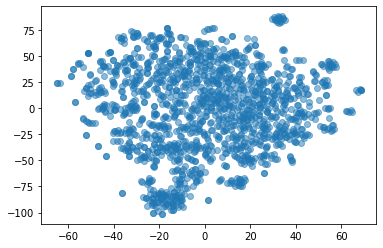

In [38]:
plt.scatter(train_df['tsne_30_x'], train_df['tsne_30_y'], alpha=.5)

In [39]:
tsne = model_tsne.fit_transform(clustered_before_df['embedding'].tolist())
clustered_before_df['tsne_30_x'] = tsne[:,0]
clustered_before_df['tsne_30_y'] = tsne[:,1]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


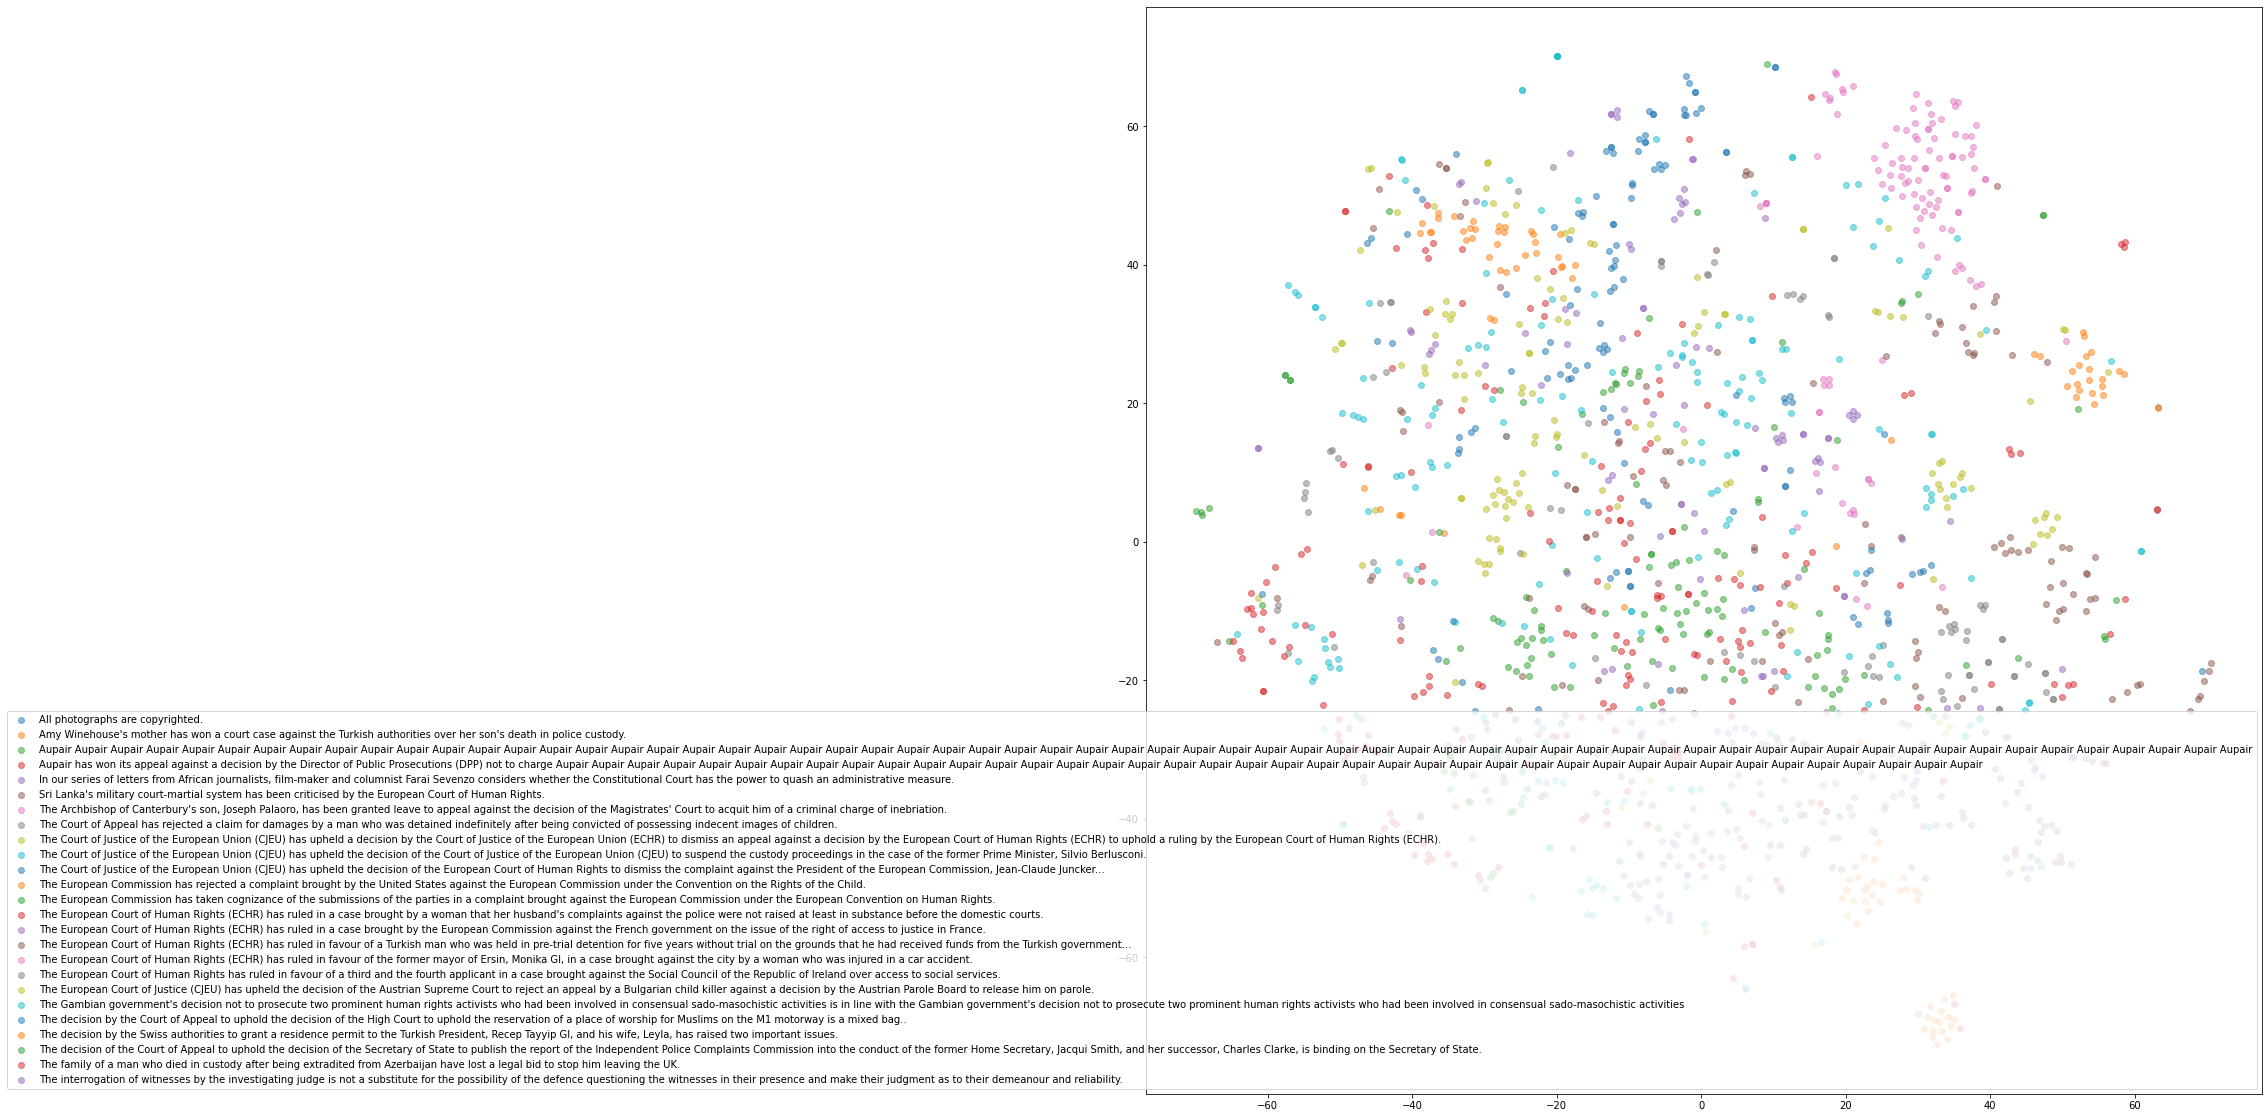

In [41]:
plt.figure(figsize=(20, 20))
for i,group in clustered_before_df.groupby('topic'):
  plt.scatter(group['tsne_30_x'], group['tsne_30_y'], alpha=.5, label = i)
plt.legend(loc='lower right')

# Clustering

In [67]:
# embedder = SentenceTransformer('distiluse-base-multilingual-cased-v2')  
def agglomerative_clustering(corpus, n_clusters, distance_threshold):
    corpus_embeddings = corpus['embedding'].tolist()
    # Normalize the embeddings to unit length
    corpus_embeddings = corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)
    clustering_model = AgglomerativeClustering(n_clusters=n_clusters, distance_threshold=distance_threshold)#affinity='cosine', linkage='average', distance_threshold=0.4)
    clustering_model.fit_predict(corpus_embeddings)
    cluster_assignment = clustering_model.labels_
    clustered_sentences = {}
    clustered_embedding = {}
    print(cluster_assignment)
    for sentence_id, cluster_id in enumerate(cluster_assignment):
        if cluster_id not in clustered_sentences:
            clustered_sentences[cluster_id] = []
        print(sentence_id,cluster_id)
        print(corpus['argument'][sentence_id])
        clustered_sentences[cluster_id].append(corpus['argument'][sentence_id])
    
    df = pd.DataFrame({"cluster_id": clustered_sentences.keys(), "argument": clustered_sentences.values()})
    return df

In [44]:
def calc_merged_df(df,clustered_df):
  # sums up previous notebook's unk clustering 
  merged_df = pd.merge(df,clustered_df.explode('argument'),how='left', left_on=['argument'], right_on = ['argument'])
  assert len(df) == len(clustered_df.explode('argument'))
  aux_df = merged_df.groupby(['cluster_id','topic']).count()['arg_id']
  topics = []
  for cluster_id in range(len(clustered_df)):
    topics.append(aux_df[cluster_id][:].idxmax())
  cluster_id_topic_series = pd.Series(index = np.arange(len(clustered_df)), data = topics)
  topic_cluster_id_series = pd.Series(data = np.arange(len(clustered_df)), index = topics)
  return merged_df

# Clustering

In [46]:
train_df.head(2)

,Unnamed: 0,name,argument,clause_id,embedding,tsne_30_x,tsne_30_y
0,737.0,17.txt,It recalls both its own findings and those of ...,5d4647d13e582511aa1ccc8d,"[-0.07845271, -0.0024478638, -0.041854553, 0.1...",9.560338,19.915459
1,1775.0,24.txt,I cannot see any justification for such differ...,5f916884bf181507836f9d03,"[-0.048609294, -0.010916819, 0.029710887, -0.0...",-64.954514,24.630823


In [66]:
train_df.iloc[1]

Unnamed: 0                                               1775.0
name                                                     24.txt
argument      I cannot see any justification for such differ...
clause_id                              5f916884bf181507836f9d03
embedding     [-0.048609294, -0.010916819, 0.029710887, -0.0...
tsne_30_x                                            -64.954514
tsne_30_y                                             24.630823
Name: 1, dtype: object

In [68]:
clustered_df = agglomerative_clustering(train_df, n_clusters=None,distance_threshold=0.4)
merged_df = calc_merged_df(train_df, clustered_df)

[ 744  212 1055 ...   67   82  137]
0 744
It recalls both its own findings and those of the Commission as to the general inadequacy and unreliability of custody records
1 212
I cannot see any justification for such differentiation, which does not find support in the wording or the purpose of Article 6 (art. 6)  .
2 1055


KeyError: ignored

In [ ]:
merged_df.head(2)

,arg_id,argument,topic,stance,embedding,tsne_30_x,tsne_30_y,cluster_id,topic_matches_cluster,pred_topic
0,arg_4_0,having a school uniform can reduce bullying as...,We should abandon the use of school uniform,-1,"[-0.01057777, 0.15846351, 0.07416532, -0.05703...",40.296482,-14.603050,3,True,We should abandon the use of school uniform
1,arg_4_1,it is a good way to instill discipline,We should abandon the use of school uniform,-1,"[0.017484298, 0.096222796, 0.011364501, 0.0203...",-30.829950,13.742941,0,False,We should adopt an austerity regime


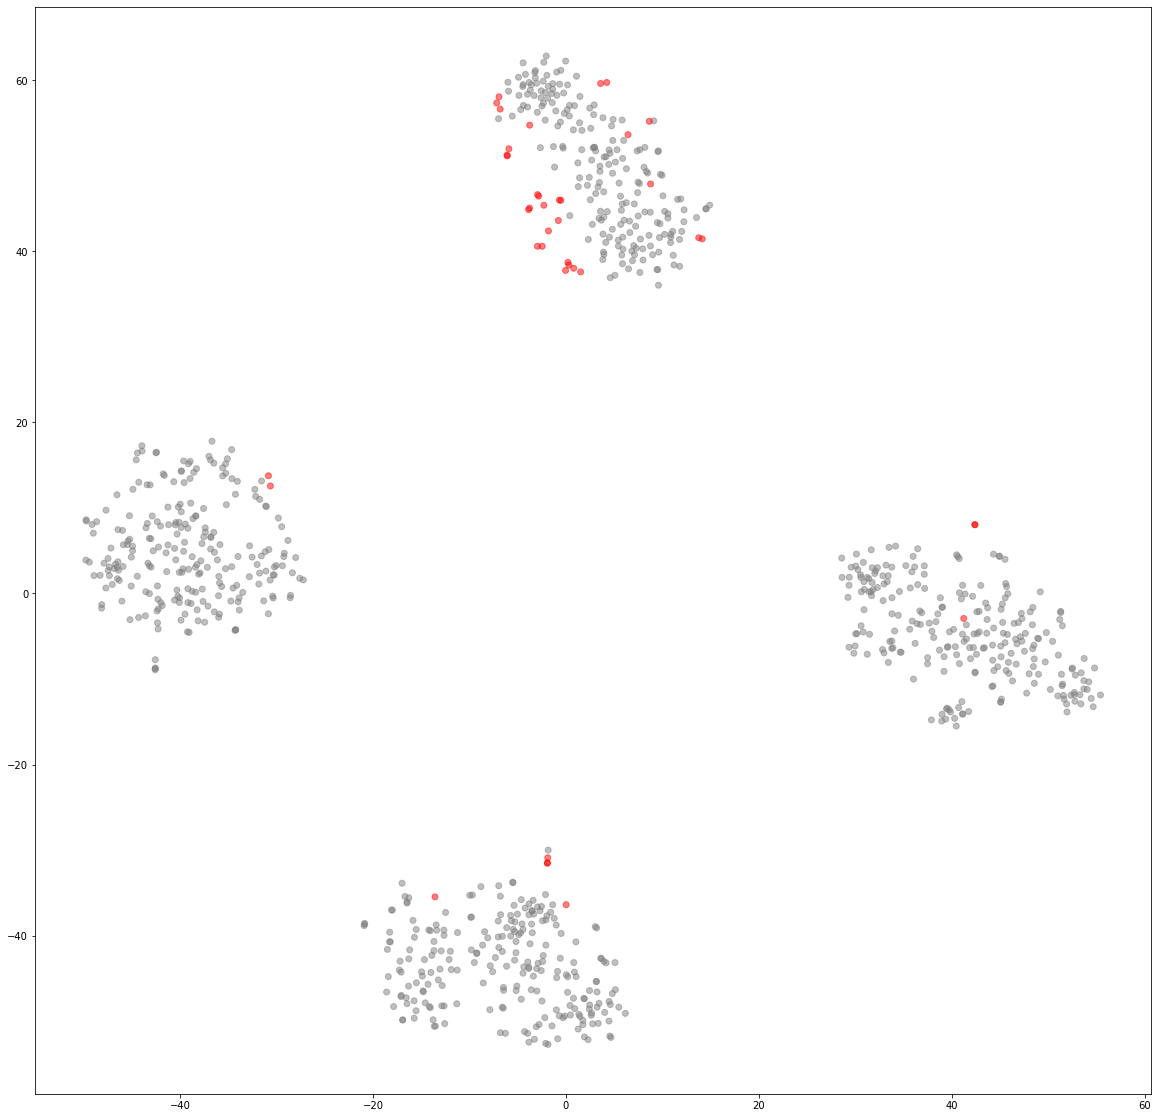

In [ ]:
import matplotlib.colors as clrs

cmap = clrs.ListedColormap(['red', 'gray'])

plt.figure(figsize=(20, 20))
plt.scatter(merged_df['tsne_30_x'], merged_df['tsne_30_y'], c = (merged_df['topic_matches_cluster']==True), alpha=.5, cmap=cmap)

# Eval on test set

### TSNE

In [ ]:
tsne = model_tsne.fit_transform(test_df['embedding'].tolist())
test_df['tsne_30_x'] = tsne[:,0]
test_df['tsne_30_y'] = tsne[:,1]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


In [ ]:
%%time
clustered_df = agglomerative_clustering(test_df, n_clusters=None,distance_threshold=10.0)
f1,merged_df = calc_metrics(test_df, clustered_df, verbose=True)

True positives: [273 232 203]
Fasle positives: [7 1 7]
False negatives: [ 2 13  0]
Precision: [0.975      0.99570815 0.96666667]
Recall: [0.99272727 0.94693878 1.        ]
Macroaverage precision 0.9791249403910348
Macroaverage recall 0.9798886827458256
Macroaverage f1 0.9795066626918789
CPU times: user 204 ms, sys: 2.95 ms, total: 207 ms
Wall time: 263 ms


In [ ]:
merged_df.head(2)

,arg_id,argument,topic,stance,embedding,tsne_30_x,tsne_30_y,cluster_id,topic_matches_cluster,pred_topic
0,arg_0_0,Routine child vaccinations isn't mandatory sin...,Routine child vaccinations should be mandatory,-1,"[0.01180115, 0.040217243, 0.016415514, -0.0091...",30.182753,-0.840252,0,True,Routine child vaccinations should be mandatory
1,arg_0_1,Routine child vaccinations should not be manda...,Routine child vaccinations should be mandatory,-1,"[-0.010956358, 0.062280614, 0.02323826, -0.042...",36.057041,2.403170,0,True,Routine child vaccinations should be mandatory


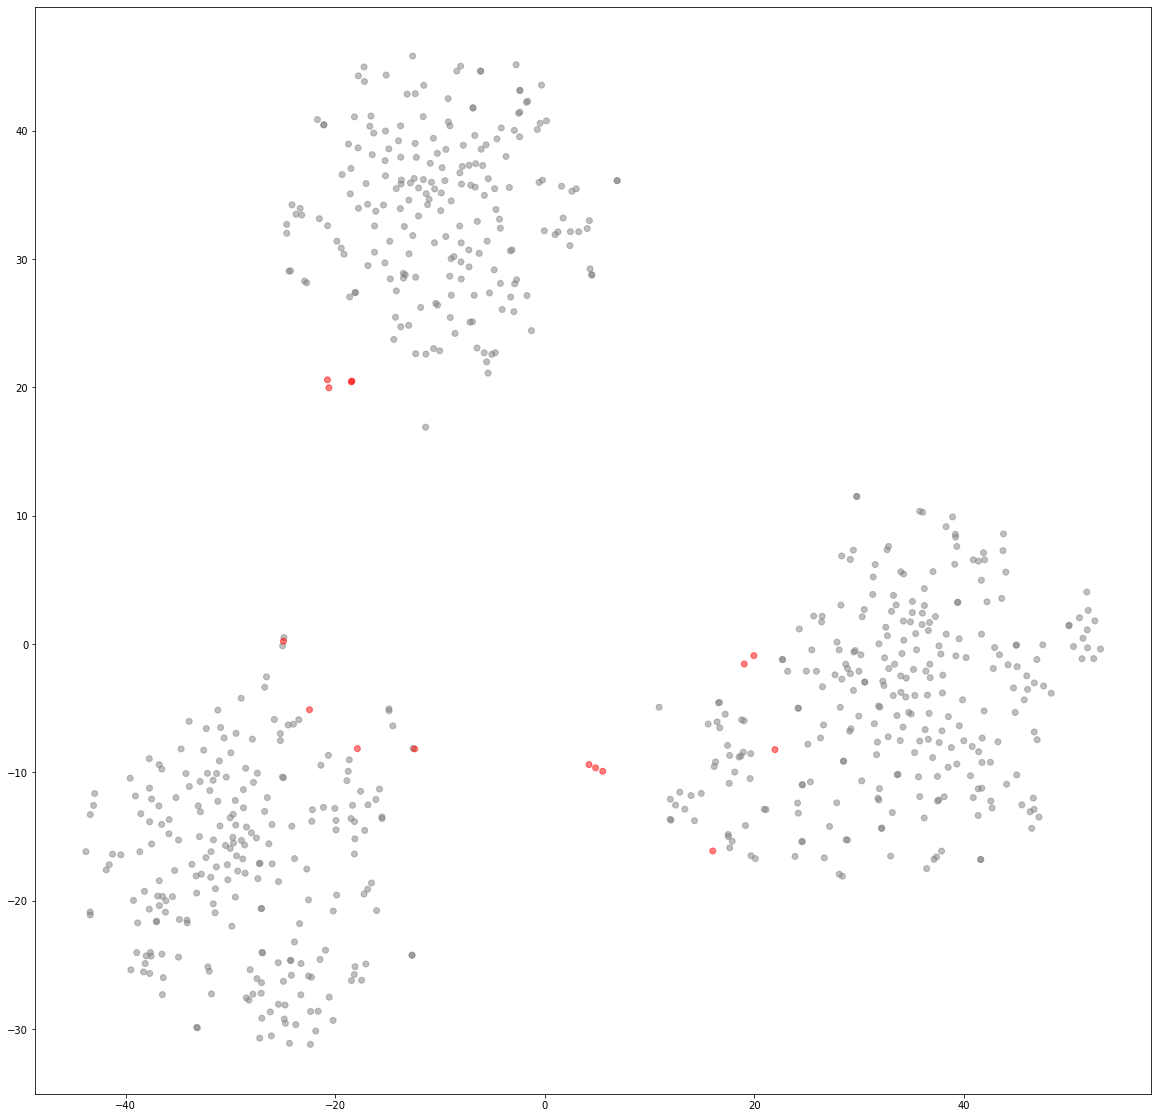

In [ ]:
import matplotlib.colors as clrs

cmap = clrs.ListedColormap(['red', 'gray'])

plt.figure(figsize=(20, 20))
plt.scatter(merged_df['tsne_30_x'], merged_df['tsne_30_y'], c = (merged_df['topic_matches_cluster']==True), alpha=.5, cmap=cmap)